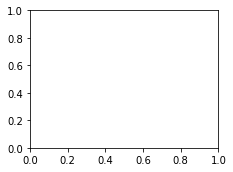

In [1]:
import os
import sys
import d00_utils.input_text as di
import d00_utils.read_log as dr
import d00_utils.data as dd
import d00_utils.plot as dp
import d00_utils.data_for_plot as ddfp
import numpy as np
import matplotlib.pyplot as plt

lmp_folder_path = di.lmp_folder_path

# pickle variable
(log_variable_dic_list, n_simu_total, log_variable, folder_path_list_initial_to_last) = dr.dump_variable(lmp_folder_path)


In [2]:
fixtimeave_id_name = 'ave_std_inwall'
v_name = 'chunk_inwall_force_1'
n_ave = 1
inputstepsarray = np.arange(10000000, 20000000, 5000000)
coord_name = 'Coord2'
fig_x_label = 'x'
fig_y_label = 'y'
labels_list = ['labels_list1', 'labels_list2']
x_scale_factor = 1
y_scale_factor = 1
if_on_paper=False
ifrotate_tick=True
ifshrink=False

In [5]:
dp.plot_wall_stress_coord(
    log_variable_dic_list,
    n_ave,
    inputstepsarray,
    v_name,
    coord_name,
    fixtimeave_id_name,
    fig_x_label,
    fig_y_label,
    x_scale_factor,
    y_scale_factor,
    if_on_paper=if_on_paper,
    ifrotate_tick=ifrotate_tick,
    ifshrink=ifshrink,
    )

SyntaxError: positional argument follows keyword argument (<ipython-input-5-10d0c6f7a10a>, line 13)

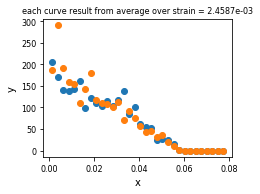

In [12]:
(stress, coord) = ddfp.chunk_wall_stress_coord(
    log_variable_dic_list,
    fixtimeave_id_name,
    v_name,
    n_ave,
    inputstepsarray,
    coord_name,
)
dp.api_plot_1D_1D_dim_xy_12(
    x_value, x_scale_factor, fig_x_label,
    y_value, y_scale_factor, fig_y_label,
    labels_list,
)
if ifrotate_tick:
    (fig, ax) = dp.rotate_ticklabel(fig, ax)
if ifshrink:
    (fig, ax) = dp.shrink(fig, ax)
if not if_on_paper:
    (fig, ax) = dp.action_for_not_on_paper(fig, ax)
    log_variable = log_variable_dic_list[-1]
    shear_rate = float(log_variable['in_velocity'])/(float(log_variable['width_wall_dp_unit'])*float(log_variable['dp']))

    titlelabel = (
        "each curve result from average over strain = " + '{:.4e}'.format(
            n_ave
            *ddfp.get_d_step(len(log_variable_dic_list)-1, fixtimeave_id_name, log_variable_dic_list)
            *float(log_variable["ts"])
            *shear_rate
        )
    )
    plt.title(titlelabel)


(<Figure size 243x182.25 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f261639a7b8>)

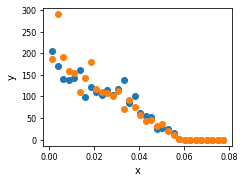